In [ ]:
### IMPORTANDO BIBLIOTECAS
import pandas as pd
import warnings as wa
import seaborn as sns
import matplotlib.pyplot as plt

### IGNORANDO WARNINGS DO TIPO FUTUREWARNING
wa.simplefilter( action='ignore', category= FutureWarning)
pd.options.mode.chained_assignment = None

### CARREGAR DATASEATS
path_periodo = "https://github.com/juvenalfonseca/python/blob/master/datasets/campeonato-brasileiro-pontos-corridos-2003-2020-periodo.csv?raw=true"
path_jogos = "https://github.com/juvenalfonseca/python/blob/master/datasets/campeonato-brasileiro-pontos-corridos-2003-2020-jogos.csv?raw=true"

df_periodo = pd.read_csv(path_periodo, delimiter=";")
df_jogos   = pd.read_csv(path_jogos  , delimiter=";")

### PADRONIZAR CAIXA DOS NOMES DAS VARIAVEIS
df_periodo.columns = df_periodo.columns.str.lower()
df_jogos.columns   = df_jogos.columns.str.lower()

### ALTERAR CAMOS DE DATAS DE CHARACTER PARA DATE
df_periodo['inicio' ] = pd.to_datetime(df_periodo['inicio'], format="%d/%m/%Y")
df_periodo['fim'    ] = pd.to_datetime(df_periodo['fim'   ], format="%d/%m/%Y")
df_jogos['data'     ] = pd.to_datetime(df_jogos['data'    ], format="%d/%m/%Y")

### CAPITALIZANDO STRINGS
df_jogos['dia'      ] = df_jogos['dia'      ].str.title()
df_jogos['mandante' ] = df_jogos['mandante' ].str.title()
df_jogos['visitante'] = df_jogos['visitante'].str.title()
df_jogos['vencedor' ] = df_jogos['vencedor' ].str.title()
df_jogos['arena'    ] = df_jogos['arena'    ].apply(lambda x: x.title())

### JUNTAR OS DATASETS E RETORNAR APENAS OS REGE+ISTROS CORRETOS CRIADOS NA JUNÇAO
df_periodo['key'] = 1
df_jogos['key'] = 1

df = pd.merge(df_periodo, df_jogos, on ='key').drop("key", 1)
df = df.query('data >= inicio & data <= fim')

df.head(5)





In [ ]:
## ANALISE DE GOLS DO CAMPEONATO

### GOLS POR EDIÇÃO
gols_mandante = df[['torneio', 'mandante placar']].groupby('torneio').agg(lambda x: sum(x)).reset_index()
gols_mandante.rename(columns = {"mandante placar": "gols_mandante"}, inplace=True)

gols_visitante = df.groupby('torneio')['visitante placar'].sum().sort_values(ascending=False).reset_index()
gols_visitante.rename(columns = {"visitante placar": "gols_visitante"}, inplace=True)

gols_edicao = pd.merge(gols_mandante, gols_visitante, on="torneio")
gols_edicao['gols_total'] = gols_edicao['gols_mandante'] + gols_edicao['gols_visitante']
gols_edicao['gols_mandante_perc'  ] = (gols_edicao['gols_mandante' ]/gols_edicao['gols_total'])*100
gols_edicao['gols_visitantes_perc'] = (gols_edicao['gols_visitante']/gols_edicao['gols_total'])*100

gols_edicao

In [9]:
### GOLS POR EDIÇÃO COMPARAIVO
df1 = gols_edicao[['torneio','gols_mandante' ]]
df2 = gols_edicao[['torneio','gols_visitante']]
df3 = gols_edicao[['torneio','gols_total'    ]]

df1.rename(columns = {'gols_mandante' : 'gols' }, inplace=True)
df2.rename(columns = {'gols_visitante': 'gols' }, inplace=True)
df3.rename(columns = {'gols_total'    : 'gols' }, inplace=True)

df1['tipo_gols'] = 'gols_mandante'
df2['tipo_gols'] = 'gols_visitante'
df3['tipo_gols'] = 'gols_total'

df4 = pd.concat([df1, df2, df3]).reset_index(drop=True)

In [ ]:
### GRAFICOS GOLS POR EDIÇÃO COMPARATIVO
sns.barplot(x="torneio", y="gols", hue="tipo_gols", data=df4)
plt.title('Gols do Brasileirão')
plt.show()

In [ ]:
### TOP 10 CLUBES GOLS MARCADOS
gols_mandante_time  = df.groupby('mandante' )['mandante placar' ].sum().sort_values(ascending=False).reset_index()
gols_mandante_time.rename(columns  = {"mandante" : "time", 'mandante placar' : 'gols marcados' }, inplace=True)

gols_visitante_time = df.groupby('visitante')['visitante placar'].sum().sort_values(ascending=False).reset_index()
gols_visitante_time.rename(columns = {"visitante": "time", 'visitante placar': 'gols marcados' }, inplace=True)

gols_time = pd.concat([gols_mandante_time, gols_visitante_time])

gols_marcados_time = gols_time.groupby('time')['gols marcados'].sum().sort_values(ascending=False).reset_index()
gols_marcados_time.head(10)

In [ ]:
### GRáFICO TOP 10 CLUBES Fgráfico top 10 clubes gols marcados
sns.barplot(x="gols marcados", y="time", data=gols_marcados_time.head(10))
plt.title('Top 10 Times Gols Marcados do Brasileirão')
plt.show()

In [ ]:
#@title Texto de título padrão
### top 10 clubes gols sofridos
gols_mandante_time  = df.groupby('visitante')['mandante placar' ].sum().sort_values(ascending=False).reset_index()
gols_mandante_time.rename(columns  = {"visitante": "time", 'mandante placar' : 'gols sofridos' }, inplace=True)

gols_visitante_time = df.groupby('mandante' )['visitante placar'].sum().sort_values(ascending=False).reset_index()
gols_visitante_time.rename(columns = {"mandante" : "time", 'visitante placar': 'gols sofridos' }, inplace=True)

gols_time = pd.concat([gols_mandante_time, gols_visitante_time])

gols_sofridos_time = gols_time.groupby('time')['gols sofridos'].sum().sort_values(ascending=False).reset_index()
gols_sofridos_time.head(10)

In [ ]:
### GRAFICO TOP 10 CLUBES GOLS SOFRIDOS
sns.barplot(x="gols sofridos", y="time", data=gols_sofridos_time.head(10))
plt.title('Top 10 Times Gols Sofridos do Brasileirão')
plt.show()

In [ ]:
### MELHORES ATAQUES POR EDIÇAO
df['clube']                  = df['mandante']
gols_clubes_mandantes        = df.groupby(['torneio','clube'])['mandante placar'].sum().sort_values(ascending=False).reset_index()
gols_clubes_mandantes.rename(columns  = {"mandante placar" : "gols_mandante" }, inplace=True)

df['clube']                  = df['visitante']
gols_clubes_visitantes       = df.groupby(['torneio','clube'])['visitante placar'].sum().sort_values(ascending=False).reset_index()
gols_clubes_visitantes.rename(columns = {"visitante placar": "gols_visitante"}, inplace=True)

gols_clubes               = pd.merge(gols_clubes_mandantes, gols_clubes_visitantes,  on=["torneio","clube"])
gols_clubes['gols_total'] = gols_clubes['gols_mandante'] + gols_clubes['gols_visitante']

ataque_pior   = gols_clubes.groupby('torneio')['gols_total'].min().sort_values(ascending=False).reset_index()
ataque_melhor = gols_clubes.groupby('torneio')['gols_total'].max().sort_values(ascending=False).reset_index()

gols_torneio_ataque_melhor = pd.merge(gols_clubes, ataque_melhor, on=['torneio','gols_total'])[['torneio','clube','gols_total']]
gols_torneio_ataque_melhor.rename(columns = {"gols_total": "ataque_melhor"}, inplace=True)

gols_torneio_ataque_pior   = pd.merge(gols_clubes, ataque_pior  , on=['torneio','gols_total'])[['torneio','clube','gols_total']]
gols_torneio_ataque_pior.rename(columns   = {"gols_total": "ataque_pior"  }, inplace=True)

gols_ataques = pd.merge(gols_torneio_ataque_melhor, gols_torneio_ataque_pior, on="torneio", suffixes=("_melhor","_pior"))
gols_ataques.sort_values(['torneio','clube_melhor'])

In [32]:
# PONTUAÇAO
pontos_participantes               = df.groupby('torneio')['mandante'].nunique().sort_values(ascending=False).reset_index()
pontos_participantes['pontos_max'] = (pontos_participantes.mandante - 1)*2*3

pontos = df[['torneio', 'mandante', 'visitante', 'mandante placar', 'visitante placar']]
pontos['pontos_mandante' ] = pontos.apply(lambda x: 3 if x['mandante placar'] > x['visitante placar'] else (0 if x['mandante placar'] < x['visitante placar'] else 1), axis=1)
pontos['pontos_visitante'] = pontos.apply(lambda x: 3 if x['mandante placar'] < x['visitante placar'] else (0 if x['mandante placar'] > x['visitante placar'] else 1), axis=1)

pontos_mandantes = pontos.groupby(['torneio','mandante' ])['pontos_mandante' ].sum().sort_values(ascending=False).reset_index()
pontos_mandantes.rename(columns = {"mandante": "clube" }, inplace=True)

pontos_visitante = pontos.groupby(['torneio','visitante'])['pontos_visitante'].sum().sort_values(ascending=False).reset_index()
pontos_visitante.rename(columns = {"visitante": "clube"}, inplace=True)

pontos_total = pd.merge(pontos_mandantes, pontos_visitante, on=['torneio','clube'])
pontos_total['pontos_total'] = pontos_total.pontos_mandante + pontos_total.pontos_visitante

In [31]:
### NUMEROS DE VITORIAS, EMPATES E DERROTAS DAS EQUIPES
resultado = pontos[['torneio','mandante','visitante','pontos_mandante','pontos_visitante']]
resultado['resultado_mandante' ] = pontos.apply(lambda x: 'Vitória' if x['pontos_mandante' ] == 3 else ('Derrota' if x['pontos_mandante' ] == 0 else 'Empate'), axis=1)
resultado['resultado_visitante'] = pontos.apply(lambda x: 'Vitória' if x['pontos_visitante'] == 3 else ('Derrota' if x['pontos_visitante'] == 0 else 'Empate'), axis=1)

resultado_mandante = resultado.groupby( ['mandante' ,'resultado_mandante' ])['torneio'].count().reset_index()
resultado_mandante.rename(columns  = {"mandante": "clube" , "resultado_mandante" :"resultado", "torneio":"ocorrencia"}, inplace=True)

resultado_visitante = resultado.groupby(['visitante','resultado_visitante'])['torneio'].count().reset_index()
resultado_visitante.rename(columns = {"visitante": "clube", "resultado_visitante":"resultado", "torneio":"ocorrencia"}, inplace=True)

resultado = pd.concat([resultado_mandante, resultado_visitante])
resultado = resultado.groupby(['clube','resultado'])['ocorrencia'].sum().reset_index()

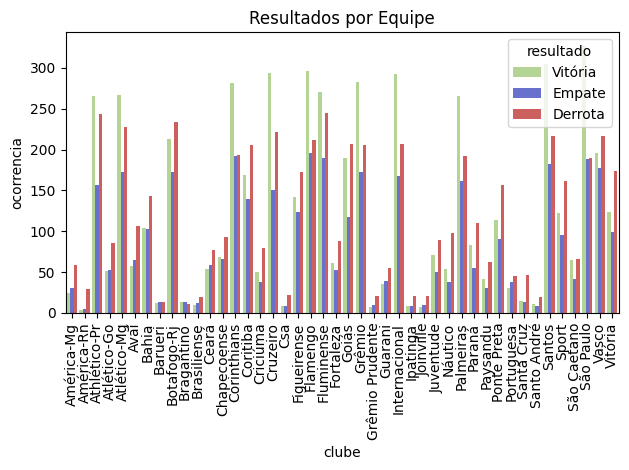

In [30]:
### GRAFICO POR VITORIAS, EMPATES E DERROTAS DA EQUIPE
colors = ["#b2df8a", "#5764db","#e14c4c"]
sns.set_palette(sns.color_palette(colors))

g = sns.barplot(x="clube", y="ocorrencia", hue="resultado", data=resultado, hue_order=['Vitória','Empate','Derrota'])
plt.title('Resultados por Equipe')
plt.xticks(rotation=90)
plt.tight_layout()

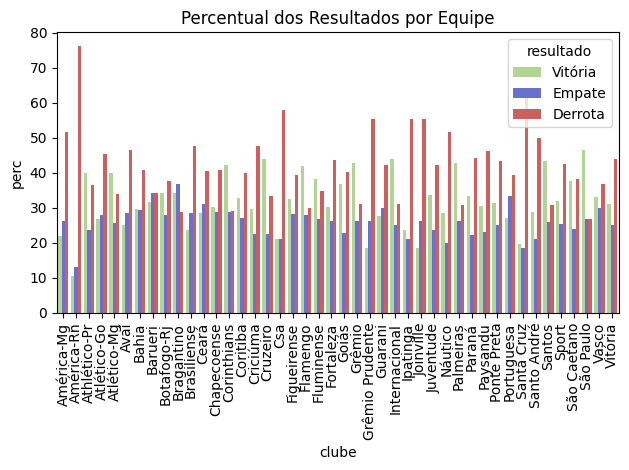

In [29]:
### GRAFICO PERCENTUAL DE RESULTADOS POR EQUIPE
percentual = resultado
perc_total = percentual.groupby(['clube'])['ocorrencia'].sum().reset_index()
percentual = pd.merge(percentual, perc_total, on='clube', suffixes=("","_y") )

percentual.rename(columns = {"ocorrencia_y": "perc"}, inplace=True)
percentual['perc'] = (percentual.ocorrencia / percentual.perc)* 100

colors = ["#b2df8a", "#5764db","#e14c4c"]
sns.set_palette(sns.color_palette(colors))

g = sns.barplot(x="clube", y="perc", hue="resultado", data=percentual, hue_order=['Vitória','Empate','Derrota'])

plt.title('Percentual dos Resultados por Equipe')
plt.xticks(rotation=90)
plt.tight_layout()

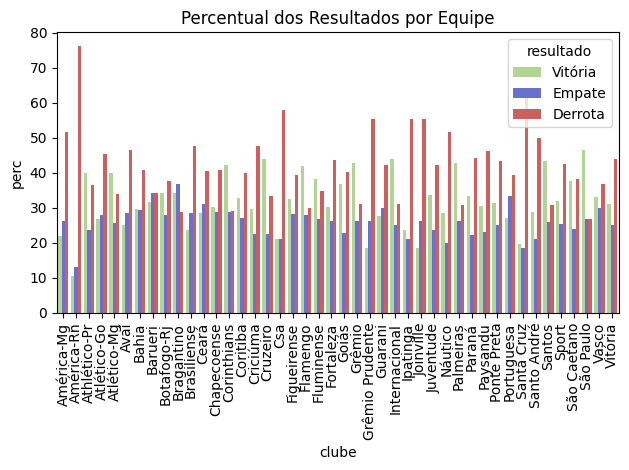

In [27]:
### GRAFICO PERCENTUAL DE RESULTADOS POR EQUIPE
percentual = resultado
perc_total = percentual.groupby(['clube'])['ocorrencia'].sum().reset_index()
percentual = pd.merge(percentual, perc_total, on='clube', suffixes=("","_y") )

percentual.rename(columns = {"ocorrencia_y": "perc"}, inplace=True)
percentual['perc'] = (percentual.ocorrencia / percentual.perc) * 100


colors = ["#b2df8a", "#5764db","#e14c4c"]
sns.set_palette(sns.color_palette(colors))

g = sns.barplot(x="clube", y="perc", hue="resultado", data=percentual, hue_order=['Vitória','Empate','Derrota'])

plt.title('Percentual dos Resultados por Equipe')
plt.xticks(rotation=90)
plt.tight_layout()

In [ ]:
### CAMPEOES
campeoes = pontos_total.groupby('torneio')['pontos_total'].max().reset_index()
campeoes.rename(columns = {"pontos_total": "maior_ponto"}, inplace=True)
campeoes = pd.merge(campeoes, pontos_total, left_on=['torneio','maior_ponto'], right_on=['torneio','pontos_total'])
campeoes = pd.merge(campeoes, pontos_participantes, on='torneio')
campeoes['aproveitamento'] = (campeoes.pontos_total / campeoes.pontos_max)*100
campeoes['ano'] = campeoes['torneio'].str.extract('(\d+)').astype(int)
campeoes

In [ ]:
### CAMPEOES COM MAIOR PONTUAÇAO
campeoes_pontuacao = campeoes[['torneio', 'clube', 'pontos_total', 'aproveitamento']]
campeoes_pontuacao['maior_ponto'] = campeoes_pontuacao.pontos_total.max()
campeoes_pontuacao['menor_ponto'] = campeoes_pontuacao['pontos_total'].min()
campeoes_pontuacao = campeoes_pontuacao.query('pontos_total == maior_ponto or pontos_total == menor_ponto')
campeoes_pontuacao['observacao'] = campeoes_pontuacao.apply(lambda x: 'Campeão com a maior pontuação' if x['pontos_total'] == x['maior_ponto'] else 'Campeão com a menor pontuação', axis=1)
campeoes_pontuacao = campeoes_pontuacao[['torneio', 'clube', 'pontos_total', 'observacao']]
campeoes_pontuacao

In [ ]:
### CAMPEOES COM O MAIOR E MENOR APROVEITAMENTO
campeoes_aproveitamento = campeoes[['torneio', 'clube', 'pontos_total', 'aproveitamento']]
campeoes_aproveitamento['maior_aproveitamento'] = campeoes_aproveitamento.aproveitamento.max()
campeoes_aproveitamento['menor_aproveitamento'] = campeoes_aproveitamento['aproveitamento'].min()
campeoes_aproveitamento = campeoes_aproveitamento.query('aproveitamento == maior_aproveitamento or aproveitamento == menor_aproveitamento')
campeoes_aproveitamento['observacao'] = campeoes_aproveitamento.apply(lambda x: 'Campeão com o maior aproveitamento' if x['aproveitamento'] == x['maior_aproveitamento'] else 'Campeão com o menor aproveitamento', axis=1)
campeoes_aproveitamento = campeoes_aproveitamento[['torneio', 'clube', 'aproveitamento', 'observacao']]
campeoes_aproveitamento

In [ ]:
### GRAFICO DE CAMPEOES POR APROVEITAMENTO
campeoes['aprov'] = campeoes.aproveitamento.astype(int)

g = sns.catplot(x='ano',y='aprov', data=campeoes, hue='clube', dodge=False, kind='bar', height=7, aspect=2)
g.set_axis_labels('Ano','Aproveitamento')
g.fig.suptitle('Aproveitamento dos campeões do brasileirão de pontos corridos', ha='center', fontsize=18)

for index, row in campeoes.iterrows():
   g.ax.text(row.name, row.aprov, row.aprov, color='black', ha="center")